In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import matplotlib.colors as mcolors
import cmasher as cmr
import math as m

# Import the Data
BAND 1

In [10]:
#Import condensed_simBS_model_num_7_sims
BS_MS_5000_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/10000_src_testing/b1_BS_condensed_sim7_model_num_5000_sims.csv')
BS_MS_5000_df_more = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/10000_src_testing/b1_BS_condensed_sim7_model_num_5000_sims_more.csv')

#Import burn slab fits
BS_BS_5000_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/10000_src_testing/condensed_simBS_model_num_5_sims_nest.csv')
BS_BS_5000_df_more = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/10000_src_testing/condensed_simburnslab_model_num_5_sims.csv') 


#True Data
BS_5000_true_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/10000_src_testing/extra_5burnslab_unif_fg_number_5000_freq_800_1089_SNR_band1.csv')
BS_5000_true_more_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/10000_src_testing/burnslab_unif_fg_number_5000_freq_800_1089_ran_SNR.csv') 



BS_5000_true_more_df.rename( columns={'Unnamed: 0':'src'}, inplace=True )
BS_5000_true_df.rename( columns={'Unnamed: 0':'src'}, inplace=True )
BS_BS_5000_df['src'] = BS_BS_5000_df['src'] - 1
BS_MS_5000_df['src'] = BS_MS_5000_df['src'] - 1
BS_MS_5000_df_more['src'] = BS_MS_5000_df_more['src'] - 1
BS_BS_5000_df_more['src'] = BS_BS_5000_df_more['src'] - 1



BS_BS_merge = pd.merge(BS_BS_5000_df, BS_5000_true_df, on='src', how='outer')
BS_MS_merge = pd.merge(BS_MS_5000_df, BS_5000_true_df, on='src', how='outer')

BS_BS_merge_5000more = pd.merge(BS_BS_5000_df_more, BS_5000_true_more_df, on='src', how='outer')
BS_MS_merge_5000more = pd.merge(BS_MS_5000_df_more, BS_5000_true_more_df, on='src', how='outer')

BS_BS_merge_5000 = pd.concat([BS_BS_merge , BS_BS_merge_5000more] , axis = 0) 
BS_MS_merge_5000 = pd.concat([BS_MS_merge , BS_MS_merge_5000more] , axis = 0) 

print(len(BS_BS_merge_5000))

10000


In [11]:
#True - Model
BS_BS_merge_5000['RM_residual'] = BS_BS_merge_5000.RM_src_radm2 - BS_BS_merge_5000.deltaRM_radm2
BS_MS_merge_5000['RM_residual'] = BS_MS_merge_5000.RM_src_radm2 - BS_MS_merge_5000.deltaRM_radm2

# Import the combined bands

In [12]:
#BS WITH MS
#Import condensed_simBS_model_num_7_sims
BS_MS_5000_df_comb = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/combined_bands/comb_BS_condensed_sim7_model_num_10000_sims.csv')
BS_BS_5000_df_comb = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/combined_bands/combined_bands_condensed_simBS_model_num_5_sims.csv')
BS_MS_5000_df_comb['src'] = BS_MS_5000_df_comb['src'] - 1
BS_BS_5000_df_comb['src'] = BS_BS_5000_df_comb['src'] - 1


#True Data
BS_5000_true_comb_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/combined_bands/combined_burnslab_unif_fg_number_7000_freq_800_1089_ran_SNR.csv')
BS_5000_true_comb_df.rename( columns={'Unnamed: 0':'src'}, inplace=True )


BS_BS_merge_comb = pd.merge(BS_BS_5000_df_comb, BS_5000_true_comb_df, on='src', how='outer')
BS_MS_merge_comb = pd.merge(BS_MS_5000_df_comb, BS_5000_true_comb_df, on='src', how='outer')

print(len(BS_5000_true_comb_df))

7000


# RM Residuals

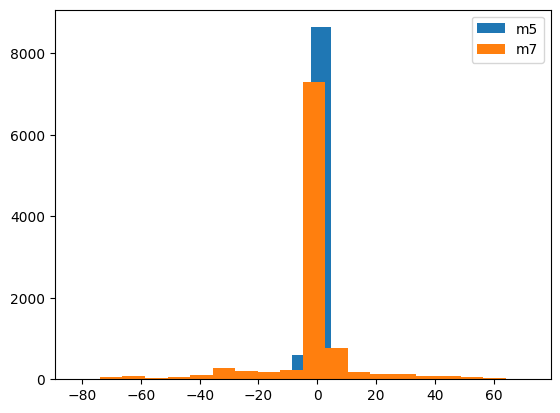

In [13]:
plt.hist(BS_BS_merge_5000.RM_residual, label='m5', bins=20)
plt.hist(BS_MS_merge_5000.RM_residual, label='m7', bins=20)
plt.xlabel('')
plt.legend()

plt.show()

In [14]:
#BS
BS_BS_merge_5000['is_good_model_chi']= BS_BS_merge_5000.chiSq < BS_MS_merge_5000.chiSq
BS_BS_merge_5000['is_good_model_BIC'] = BS_BS_merge_5000.BIC < BS_MS_merge_5000.BIC
BS_BS_merge_5000['is_good_model_AIC'] = BS_BS_merge_5000.AIC < BS_MS_merge_5000.AIC
BS_BS_merge_5000['is_good_model_evd'] = BS_BS_merge_5000['ln(EVIDENCE) '] > BS_MS_merge_5000['ln(EVIDENCE) ']

# Make the Bar Plot

/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_13747/1250812794.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


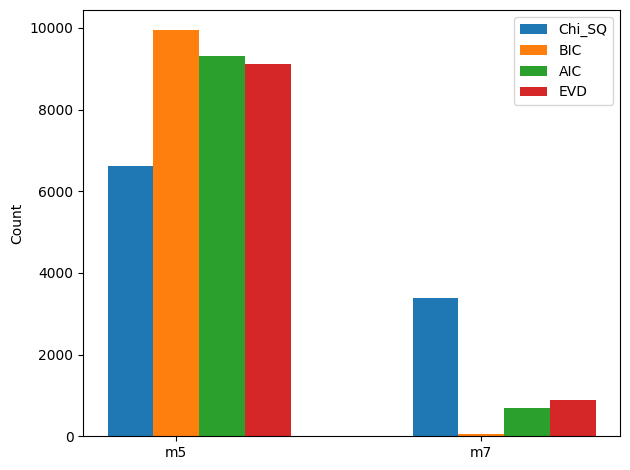

In [15]:
#Calculate the percentages



species = ("m5", "m7")
penguin_means = {
    'Chi_SQ': [np.sum(BS_BS_merge_5000['is_good_model_chi']), (10000-np.sum(BS_BS_merge_5000['is_good_model_chi']))],
    'BIC': [np.sum(BS_BS_merge_5000['is_good_model_BIC']), (10000-np.sum(BS_BS_merge_5000['is_good_model_BIC']))],
    'AIC': [np.sum(BS_BS_merge_5000['is_good_model_AIC']), (10000-np.sum(BS_BS_merge_5000['is_good_model_AIC']))],
    'EVD': [np.sum(BS_BS_merge_5000['is_good_model_evd']), (10000-np.sum(BS_BS_merge_5000['is_good_model_evd']))],
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
#ax.set_title('Burn Slab')
ax.set_xticks(x + width, species)
ax.legend(loc='upper right', ncols=1)
plt.tight_layout()
plt.show()


In [16]:
BS_BS_merge_5000['delta_BIC_5_7']= BS_BS_merge_5000.BIC - BS_MS_merge_5000.BIC

# But First the Counts

Index(['Unnamed: 0', 'src', 'fracPol', 'psi0_deg_x', 'RM_radm2',
       'deltaRM_radm2', 'fracPol_plus_err', 'psi0_deg_plus_err',
       'RM_radm2_plus_err', 'deltaRM_radm2_plus_err', 'fracPol_minus_err',
       'psi0_deg_minus_err', 'RM_radm2_minus_err', 'deltaRM_radm2_minus_err',
       'fracPol_bounds', 'psi0_deg_bounds', 'RM_radm2_bounds',
       'deltaRM_radm2_bounds', 'chiSq', 'chiSqRed', 'AIC', 'AICc', 'BIC',
       'ln(EVIDENCE) ', 'dLn(EVIDENCE)', 'frac_pol', 'psi0_deg_y',
       'psi0_2_deg', 'RM_screen_radm2', 'RM_screen_2_radm2', 'RM_src_radm2',
       'sigma_RM_2', 'sigmaRM_FG', 'frac_pol_2_comp', 'SNR', 'model',
       'frac_pol_seed', 'RM_screen_seed', 'RM_source_seed', 'sigmaRM_seed',
       'sigma_FG_seed', 'psi0_seed', 'RM_residual', 'is_good_model_chi',
       'is_good_model_BIC', 'is_good_model_AIC', 'is_good_model_evd',
       'delta_BIC_5_7'],
      dtype='object')


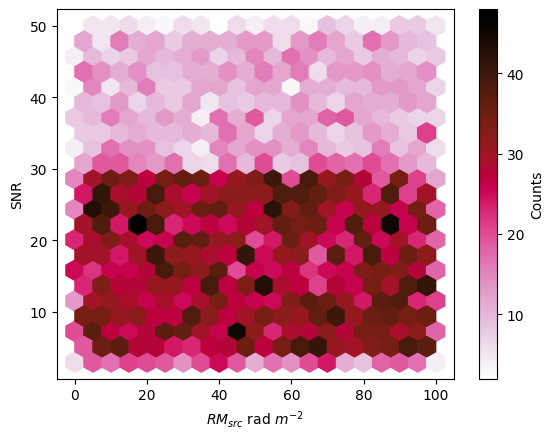

In [17]:
plt.hexbin(BS_BS_merge_5000['RM_src_radm2'] , BS_BS_merge_5000['SNR'], gridsize=20, reduce_C_function=np.sum, cmap='cmr.flamingo_r')
plt.xlabel('$RM_{src}$ rad $m^{-2}$')
plt.ylabel('SNR')
plt.colorbar(label='Counts')
print(BS_BS_merge_5000.keys())


## Need to check the other parameters first

<>:28: SyntaxWarning: invalid escape sequence '\p'
<>:28: SyntaxWarning: invalid escape sequence '\p'
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_13747/2362695680.py:28: SyntaxWarning: invalid escape sequence '\p'
  ax_test[2].set_xlabel('$\psi_{0}$ ')


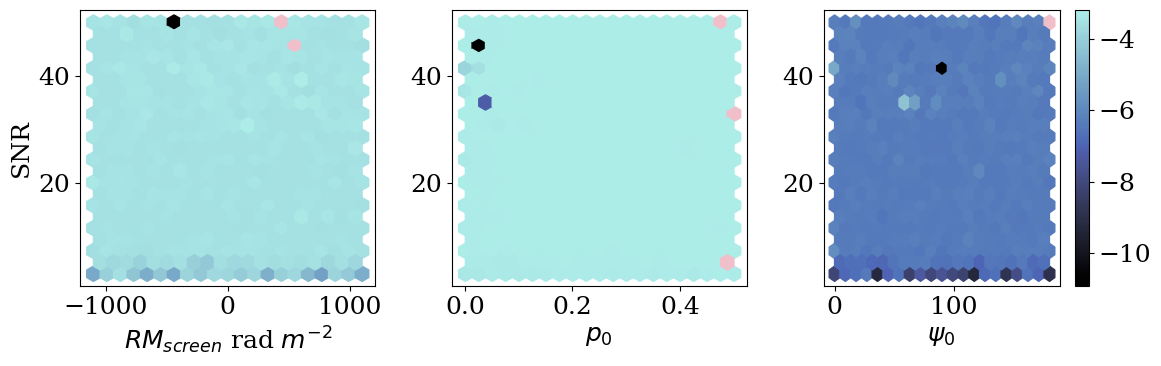

In [18]:
from matplotlib import gridspec
plt.rcParams.update({'font.size': 18})
plt.rc('font'  ,family='serif')
fig_chi, ax_test = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
from matplotlib.colors import ListedColormap

bottom = plt.get_cmap('cmr.dusk_r',  1)
top= plt.get_cmap('cmr.sapphire' , 255)
newcolors = np.vstack((top(np.linspace(0 , 1 , 255)), 
                bottom(np.linspace(0 , 0.09 , 1))))
newcmp = ListedColormap(newcolors , name='embersaph')

bounds = [-2000, -40,  -10,  -5, -1,  0,  10]
cmap_rb = plt.get_cmap(newcmp)
colors = cmap_rb(np.linspace(0 , 1 , len(bounds) - 1))
cmap , norm = mcolors.from_levels_and_colors(bounds , colors)



hex1 = ax_test[0].hexbin(BS_BS_merge_5000['RM_screen_radm2'], BS_BS_merge_5000['SNR'], BS_BS_merge_5000['delta_BIC_5_7'], reduce_C_function=np.median, gridsize=20 , cmap=newcmp)
ax_test[0].set_xlabel('$RM_{screen}$ rad $m^{-2}$')
ax_test[0].set_ylabel('SNR')

hex2 = ax_test[1].hexbin(BS_BS_merge_5000['frac_pol'], BS_BS_merge_5000['SNR'], BS_BS_merge_5000['delta_BIC_5_7'], reduce_C_function=np.median, gridsize=20, cmap=newcmp)
ax_test[1].set_xlabel('$p_{0}$ ')

hex3 = ax_test[2].hexbin(BS_BS_merge_5000['psi0_deg_y'], BS_BS_merge_5000['SNR'], BS_BS_merge_5000['delta_BIC_5_7'], reduce_C_function=np.median, gridsize=20, cmap=newcmp)
ax_test[2].set_xlabel('$\psi_{0}$ ')

plt.colorbar(hex3)
plt.tight_layout()


In [19]:
hex1 = ax_test[0].hexbin(BS_BS_merge_5000['RM_src_radm2'], BS_BS_merge_5000['SNR'], BS_BS_merge_5000['delta_BIC_5_7'], reduce_C_function=np.median, gridsize=20 , vmax=11, cmap=newcmp)


<>:36: SyntaxWarning: invalid escape sequence '\D'
<>:36: SyntaxWarning: invalid escape sequence '\D'
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_13747/2444790519.py:36: SyntaxWarning: invalid escape sequence '\D'
  cb = plt.colorbar(hex2 , label='$\Delta$ $BIC_{T A}$' , ticklocation='bottom')


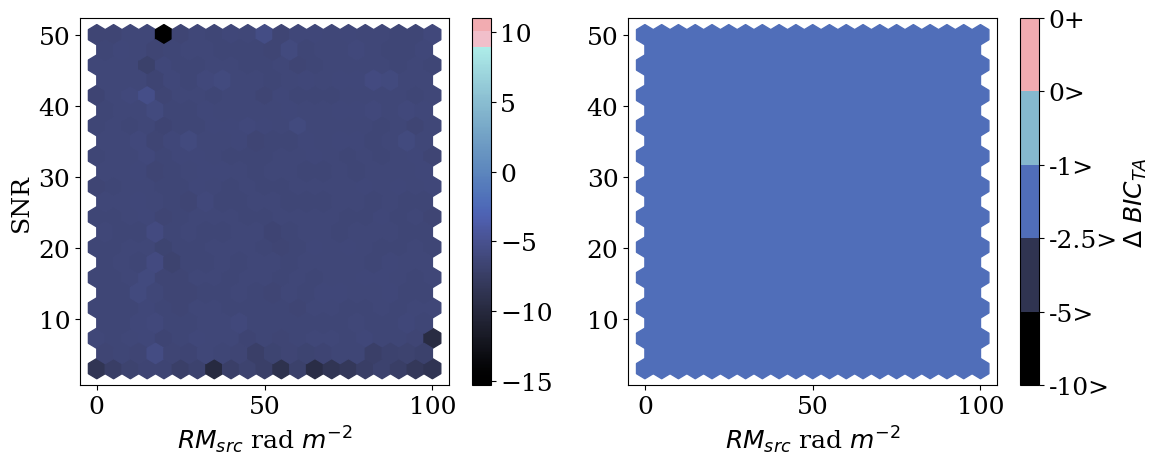

In [20]:
from matplotlib import gridspec
plt.rcParams.update({'font.size': 18})
plt.rc('font'  ,family='serif')
fig_chi, ax_test = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharex=True)
from matplotlib.colors import ListedColormap





bottom = plt.get_cmap('cmr.dusk_r',  20)
top= plt.get_cmap('cmr.sapphire' , 236)
newcolors = np.vstack((top(np.linspace(0 , 1 , 236)), 
                bottom(np.linspace(0 , 0.09 , 20))))
newcmp = ListedColormap(newcolors , name='embersaph')

bounds = [-2000, -500,  -100,  -5,  0,  10]
cmap_rb = plt.get_cmap(newcmp)
colors = cmap_rb(np.linspace(0 , 1 , len(bounds) - 1))
cmap , norm = mcolors.from_levels_and_colors(bounds , colors)

hex1 = ax_test[0].hexbin(BS_BS_merge_5000['RM_src_radm2'] , BS_BS_merge_5000['SNR']  , BS_BS_merge_5000['delta_BIC_5_7'] , reduce_C_function=np.median, gridsize=20 , vmax=11, cmap=newcmp)
ax_test[0].set_xlabel('$RM_{src}$ rad $m^{-2}$')
ax_test[0].set_ylabel('SNR')

hex2 = ax_test[1].hexbin(BS_BS_merge_5000['RM_src_radm2'] , BS_BS_merge_5000['SNR']  , BS_BS_merge_5000['delta_BIC_5_7'] , norm=norm , reduce_C_function=np.median, gridsize=20 , cmap=cmap)
ax_test[1].set_xlabel('$RM_{src}$ rad $m^{-2}$')
#plt.ylabel(values_interest[y_index])
#ax_test[0].set_title('Slab')



cb2 = plt.colorbar(hex1)

labels = ('-10>', '-5>','-2.5>', '-1>', '0>' ,'0+')
cb = plt.colorbar(hex2 , label='$\Delta$ $BIC_{T A}$' , ticklocation='bottom')
cb.ax.set_yticklabels(labels)
plt.tight_layout()
plt.show()


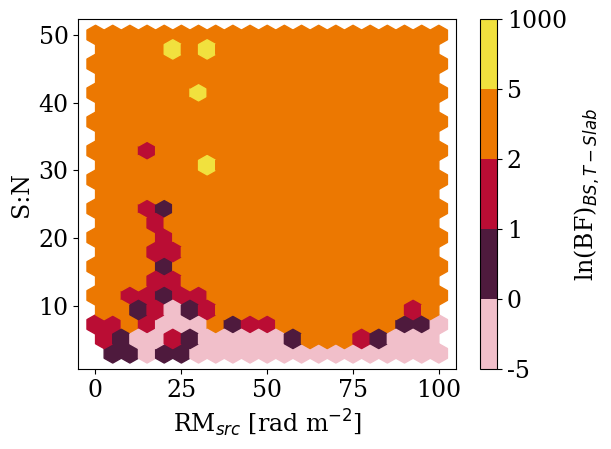

In [49]:
from matplotlib import gridspec
plt.rcParams.update({'font.size': 17})
plt.rc('font'  ,family='serif')
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors


BS_BS_merge_5000['delta_evd_5_7']= BS_BS_merge_5000['ln(EVIDENCE) ']- BS_MS_merge_5000['ln(EVIDENCE) ']
BS_BS_merge_comb['delta_evd_5_7']= BS_BS_merge_comb['ln(EVIDENCE) ']- BS_MS_merge_comb['ln(EVIDENCE) ']


bottom = plt.get_cmap('cmr.dusk_r',  1)
top= plt.get_cmap('cmr.ember' , 255)
newcolors = np.vstack((bottom(np.linspace(0 , 0.9 , 1)), 
                top(np.linspace(0 , 1 , 255))))
newcmp = ListedColormap(newcolors , name='embersaph')

bounds = [-10, 0,  1,  2,  5,  10000000000000000000]
cmap_rb = plt.get_cmap(newcmp)
colors = cmap_rb(np.linspace(0 , 1 , len(bounds) - 1))
cmap , norm = mcolors.from_levels_and_colors(bounds , colors)

#hex1 = ax_test[1].hexbin(BS_BS_merge_5000['RM_src_radm2'] , BS_BS_merge_5000['SNR']  , BS_BS_merge_5000['delta_evd_5_7'] , gridsize=20 , norm=normEVD, cmap=cmapEVD, reduce_C_function=np.nanmedian)
#ax_test[1].set_xlabel('$RM_{src}$ [rad $m^{-2}$]')
#ax_test[1].set_ylabel('S:N')

hex2 = plt.hexbin(BS_BS_merge_comb['RM_src_radm2'] , BS_BS_merge_comb['SNR']  , BS_BS_merge_comb['delta_evd_5_7'], gridsize=20 , norm=normEVD, cmap=cmap, reduce_C_function=np.nanmedian)
plt.ylabel('S:N')
plt.xlabel('RM$_{src}$ [rad m$^{-2}$]')
#plt.ylabel(values_interest[y_index])
#ax_test[0].set_title('Slab')

labels = ('-5', '0','1', '2', '5' ,'1000')
cb = plt.colorbar(hex2 , label='ln(BF)$_{BS,T-Slab}$' , ticklocation='bottom')
cb.ax.set_yticklabels(labels)

#cb2 = plt.colorbar(hex1, label='ln(BF)$_{BS,T-Slab})$' , ticklocation='bottom')
#cb2.ax.set_yticklabels(labels)
plt.tight_layout()
plt.savefig('BS-MS_selection_comb.pdf', format='pdf')

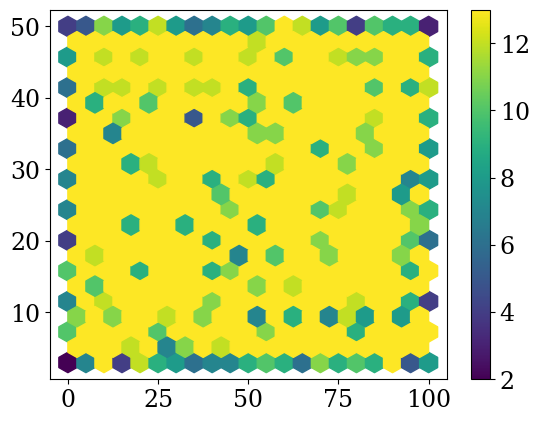

In [22]:
plt.hexbin(BS_BS_merge_comb['RM_src_radm2'] , BS_BS_merge_comb['SNR'], gridsize=20, vmax=13, reduce_C_function=np.sum)
plt.colorbar()


In [27]:
def percentage_reduce_BIC_C(C):
    C = np.asarray(C)
    percentage = (len(C[C>2]) / len(C)) * 100 
    
    return percentage



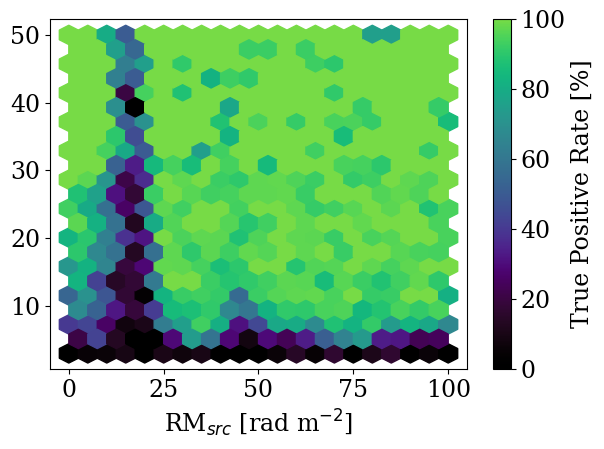

In [36]:
from matplotlib import gridspec
plt.rcParams.update({'font.size': 17})
plt.rc('font', family='serif')


bounds = [-2000,-500, -100, -5, 0, 10]
cmap_rb = plt.get_cmap('cmr.sapphire')
colors = cmap_rb(np.linspace(0, 1, len(bounds) - 1))
cmap, norm = mcolors.from_levels_and_colors(bounds, colors)


plt.hexbin(BS_BS_merge_5000['RM_src_radm2'],BS_BS_merge_5000['SNR'], BS_BS_merge_5000['delta_evd_5_7'], reduce_C_function=percentage_reduce_BIC_C, gridsize=20, cmap='cmr.lavender')
plt.xlabel('RM$_{src}$ [rad m$^{-2}$]')
#plt.ylabel('S:N')
#ax_test[0].set_title('Slab')

#labels = (' ','S', 'M', 'W', 'IC' ,'IM')
cb = plt.colorbar(label='True Positive Rate [%]', ticklocation='bottom')
plt.tight_layout()
plt.savefig('BS_Tslab_true_positive_rate.pdf', format='pdf')
#cb.ax.set_yticklabels(labels)
plt.show()




## ABCD Plot finding the once on the stripe

In [63]:
def burnslabs_modelling(lambda_sq,  RM_screen, frac_pol, RM_src, psi0_deg):
     
    quarr_LoS = frac_pol * np.abs((np.sin(RM_src * lambda_sq))/(RM_src * lambda_sq)) 
    
    complex_p = []
    for qu in quarr_LoS:
        complex_p.append(np.sqrt(qu.real**2 + qu.imag**2))
    
    return quarr_LoS

def mixedslabs_modelling(lambda_sq,  RM_screen, frac_pol, RM_src, psi0_deg, sigma_RM_2):

    para_S = (2. * lambda_sq**2 * sigma_RM_2**2 - 2j * lambda_sq * RM_src) 
    quarr = (frac_pol * np.exp( 2j * (np.radians(psi0_deg) + RM_screen * lambda_sq)) * (1 - np.exp(-1.*para_S)) / para_S)
      
    quarr_LoS = np.abs(quarr) 

    complex_p = []
    for qu in quarr_LoS:
        complex_p.append(np.sqrt(qu.real**2 + qu.imag**2))

    return quarr_LoS

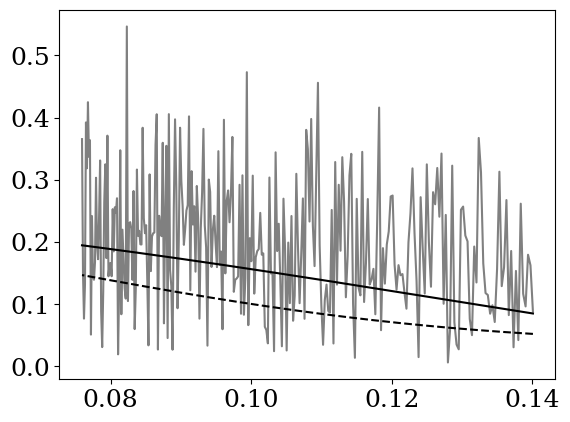

In [64]:
#Import the data
import numpy as np
c = 299792458.

RM_src_BS = BS_BS_5000_df.deltaRM_radm2[338]
RM_screen_bs = BS_BS_5000_df.RM_radm2[338]
psi_not_bs =  BS_BS_5000_df.psi0_deg[338]
frac_pol_BS = BS_BS_5000_df.fracPol[338]

RM_src_MS = BS_MS_5000_df.deltaRM_radm2[338]
sigma_MS = BS_MS_5000_df.sigmaRM_radm2[338]
RM_screen_Ms = BS_MS_5000_df.RM_radm2[338]
psi_not_Ms = BS_MS_5000_df.psi0_deg[338]
frac_pol_MS = BS_MS_5000_df.fracPol[338]

data_q_u = np.genfromtxt('/Users/loberhel/Desktop/Project_2_Data/5k_burnslabs_b1/338.dat', names=True, dtype=None, delimiter=' ')

freq_arr = []
q_arr = []
u_arr = []

for row in data_q_u:
    freq_arr.append(row[0])
    q_arr.append(row[1])
    u_arr.append(row[2])

q_arr = np.asarray(q_arr)
u_arr = np.asarray(u_arr)
    
p_arr = np.sqrt(q_arr**2 + u_arr**2) 
freq_arr=np.asarray(freq_arr) 
lambda_sqr_array = np.power(c/freq_arr, 2.0) 
quarr_LOS_BS = burnslabs_modelling(lambda_sqr_array, RM_screen_bs, frac_pol_BS, RM_src_BS, psi_not_bs)
quarr_LOS_MS = mixedslabs_modelling(lambda_sqr_array, RM_screen_bs, frac_pol_BS, RM_src_BS, psi_not_bs, sigma_MS)



#plt.scatter(lambda_sqr_array, q_arr, marker='.', c='b')
plt.plot(lambda_sqr_array, p_arr, c='grey')
#plt.scatter(lambda_sqr_array, u_arr,marker='.', c='r')

plt.plot(lambda_sqr_array, quarr_LOS_BS, c='k', label='Burn Slab')
plt.plot(lambda_sqr_array, quarr_LOS_MS, c='k', linestyle='--', label='Mixed Slab')
plt.show()




<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:28: SyntaxWarning: invalid escape sequence '\D'
<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:28: SyntaxWarning: invalid escape sequence '\D'
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_73554/1527261022.py:18: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sigma_{RM, QU}$')
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_73554/1527261022.py:28: SyntaxWarning: invalid escape sequence '\D'
  cb = plt.colorbar(hex2, label='$ln(\Delta$ $Bayes Factor_{T,A}$)', ticklocation='bottom')


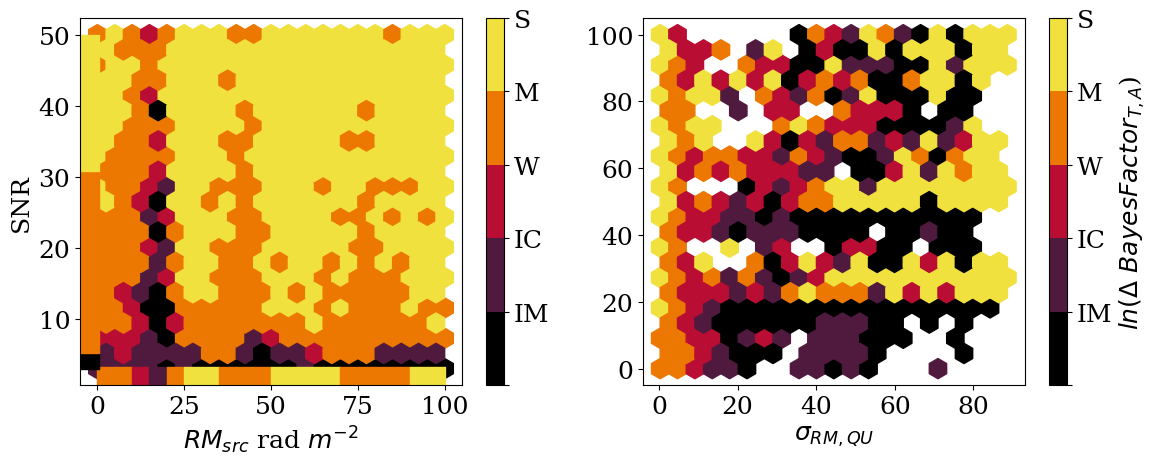

In [65]:
from matplotlib import gridspec
plt.rcParams.update({'font.size': 18})
plt.rc('font', family='serif')
fig_chi, ax_test = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

BS_BS_merge_5000['delta_evd_5_7'] = BS_BS_merge_5000['ln(EVIDENCE) '] - BS_MS_merge_5000['ln(EVIDENCE) ']

bounds = [-10,0, 1, 2.0, 4, 7000] 
cmap_rb = plt.get_cmap('cmr.ember')
colors = cmap_rb(np.linspace(0, 1, len(bounds) - 1))
cmap, norm = mcolors.from_levels_and_colors(bounds, colors)

hex1 = ax_test[0].hexbin(BS_BS_merge_5000['RM_src_radm2'],BS_BS_merge_5000['SNR'], BS_BS_merge_5000['delta_evd_5_7'],norm=norm, gridsize=20, cmap=cmap, marginals = True, reduce_C_function=np.median)
ax_test[0].set_xlabel('$RM_{src}$ rad $m^{-2}$')
ax_test[0].set_ylabel('SNR')

hex2 = plt.hexbin(BS_MS_merge_5000['sigmaRM_radm2'], BS_BS_merge_5000['RM_src_radm2'], BS_BS_merge_5000['delta_evd_5_7'], gridsize=20, norm=norm, cmap=cmap, reduce_C_function=np.median)
plt.xlabel('$\sigma_{RM, QU}$')
#plt.ylabel(values_interest[y_index])
#ax_test[0].set_title('Slab')


labels = (' ','IM', 'IC', 'W', 'M' ,'S')
cb2 = plt.colorbar(hex1)
cb2.ax.set_yticklabels(labels)

labels = (' ','IM', 'IC', 'W', 'M' ,'S')
cb = plt.colorbar(hex2, label='$ln(\Delta$ $Bayes Factor_{T,A}$)', ticklocation='bottom')
cb.ax.set_yticklabels(labels)
plt.tight_layout()
plt.show()

AttributeError: 'PolyCollection' object has no attribute 'get_gridsize'

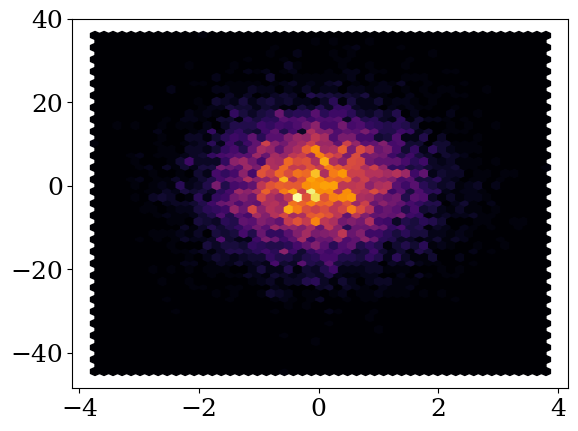

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
np.random.seed(0)
x = np.random.randn(10000)
y = np.random.randn(10000) * 10

# Create a hexbin plot
hb = plt.hexbin(x, y, gridsize=50, cmap='inferno')

# Get the positions of the bins
verts = hb.get_offsets()

# Calculate the percentage of points greater than 100 for each bin
counts = hb.get_array()
mask = y > 100
percentage = np.zeros_like(counts, dtype=float)

for i, (xv, yv) in enumerate(verts):
    mask_bin = (np.abs(x - xv) < hb.get_gridsize()[0] / 2) & (np.abs(y - yv) < hb.get_gridsize()[1] / 2)
    total_points = np.sum(mask_bin)
    if total_points > 0:
        percentage[i] = np.sum(mask & mask_bin) / total_points

# Plot the hexbin with percentages
plt.hexbin(x, y, C=percentage, gridsize=50, cmap='inferno')
plt.colorbar(label='Percentage of points > 100')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Hexbin plot colored by percentage of points > 100')
plt.show()

# Band 1 Mixed Slab Population

In [52]:
MS_MS_5000_df_b1 = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/mixed_slab_random_screen/band1/b1_MS_condensed_sim7_model_num_10000_sims.csv')
MS_BS_5000_df_b1 = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/mixed_slab_random_screen/band1/b1_MS_condensed_sim5_model_num_10000_sims.csv')

b1_MS_5000_true_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/mixed_slab_random_screen/band1/mixedslab_unif_fg_number_10000_freq_800_1089_SNR_band1.csv')

b1_MS_5000_true_df.rename( columns={'Unnamed: 0':'src'}, inplace=True )
MS_MS_5000_df_b1['src'] = MS_MS_5000_df_b1['src'] - 1
MS_BS_5000_df_b1['src'] = MS_BS_5000_df_b1['src'] - 1


MS_MS_merge_7000_b1 = pd.merge(MS_MS_5000_df_b1, b1_MS_5000_true_df, on='src', how='outer')
MS_BS_merge_7000_b1 = pd.merge(MS_BS_5000_df_b1, b1_MS_5000_true_df, on='src', how='outer')

print(len(MS_MS_5000_df_b1))

7439


## Combined Band

In [53]:
BS_MS_5000_df_comb = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/combined_bands/comb_BS_condensed_sim7_model_num_5000_sims.csv')
BS_BS_5000_df_comb = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/combined_bands/combined_bands_condensed_simBS_model_num_5_sims.csv')

combined_BS_5000_true_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/combined_bands/burnslab_unif_fg_number_7000_freq_800_1089_ran_SNR.csv')

combined_BS_5000_true_df.rename( columns={'Unnamed: 0':'src'}, inplace=True )
BS_BS_5000_df_comb['src'] = BS_BS_5000_df_comb['src'] - 1
BS_MS_5000_df_comb['src'] = BS_MS_5000_df_comb['src'] - 1


BS_BS_merge_7000_comb = pd.merge(BS_BS_5000_df_comb, combined_BS_5000_true_df, on='src', how='outer')
BS_MS_merge_7000_comb = pd.merge(BS_MS_5000_df_comb, combined_BS_5000_true_df, on='src', how='outer')

print(len(BS_MS_5000_df_comb))
                            

3467


In [54]:
resid_MS = BS_MS_merge_7000_comb.RM_screen_radm2 - BS_MS_merge_7000_comb.RM_radm2

In [55]:
BS_BS_merge_7000_comb['delta_evd_5_7'] = BS_BS_5000_df_comb['ln(EVIDENCE) '] - BS_MS_5000_df_comb['ln(EVIDENCE) ']
BS_BS_merge_7000_comb['delta_BIC_5_7'] = BS_BS_5000_df_comb.BIC - BS_MS_5000_df_comb.BIC

In [56]:
BS_BS_merge_7000_comb['is_good_model_chi'] = BS_BS_merge_7000_comb.chiSq < BS_MS_merge_7000_comb.chiSq
BS_BS_merge_7000_comb['is_good_model_BIC'] = BS_BS_merge_7000_comb.BIC < BS_MS_merge_7000_comb.BIC
BS_BS_merge_7000_comb['is_good_model_AIC'] = BS_BS_merge_7000_comb.AIC < BS_MS_merge_7000_comb.AIC
BS_BS_merge_7000_comb['is_good_model_evd'] = BS_BS_merge_7000_comb['ln(EVIDENCE) '] > BS_MS_merge_7000_comb['ln(EVIDENCE) ']

/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_13747/1497472833.py:27: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


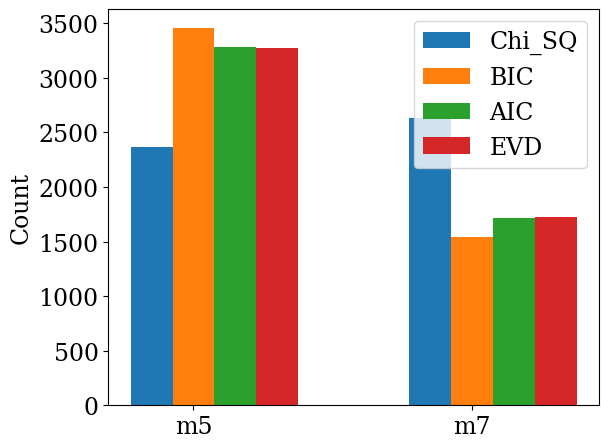

In [57]:
#Calculate the percentages
species = ("m5", "m7")
penguin_means = {
    'Chi_SQ': [np.sum(BS_BS_merge_7000_comb['is_good_model_chi']), (5000-np.sum(BS_BS_merge_7000_comb['is_good_model_chi']))],
    'BIC': [np.sum(BS_BS_merge_7000_comb['is_good_model_BIC']), (5000-np.sum(BS_BS_merge_7000_comb['is_good_model_BIC']))],
    'AIC': [np.sum(BS_BS_merge_7000_comb['is_good_model_AIC']), (5000-np.sum(BS_BS_merge_7000_comb['is_good_model_AIC']))],
    'EVD': [np.sum(BS_BS_merge_7000_comb['is_good_model_evd']), (5000-np.sum(BS_BS_merge_7000_comb['is_good_model_evd']))],
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
#ax.set_title('Burn Slab')
ax.set_xticks(x + width, species)
ax.legend(loc='upper right', ncols=1)
plt.tight_layout()
plt.show()

# Comparing results of BIC and evidence 

In [58]:
print(np.sum(BS_BS_merge_7000_comb['delta_evd_5_7'] >  2.5)/ len(BS_BS_merge_5000['delta_evd_5_7'])*100)
print(np.sum(BS_BS_merge_7000_comb['delta_BIC_5_7'] < -2.5) / len(BS_BS_merge_5000['delta_BIC_5_7']) *100)


16.18
16.17


# Mixed Slabs Populations

In [59]:
MS_BS_10000_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/mixed_slab_random_screen/band1/b1_MS_condensed_sim5_model_num_10000_sims.csv')
MS_MS_10000_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/mixed_slab_random_screen/band1/b1_MS_condensed_sim7_model_num_10000_sims.csv')

print(len(MS_BS_10000_df))

MS_band1_true_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/mixed_slab_random_screen/band1/mixedslab_unif_fg_number_10000_freq_800_1089_SNR_band1.csv')

MS_band1_true_df.rename(columns={'Unnamed: 0':'src'}, inplace=True )

MS_MS_10000_df['src'] = MS_MS_10000_df['src'] - 1
MS_BS_10000_df['src'] = MS_BS_10000_df['src'] - 1

MS_MS_band1_merge = pd.merge(MS_MS_10000_df, MS_band1_true_df, on='src', how='outer')
MS_BS_band1_merge = pd.merge(MS_BS_10000_df, MS_band1_true_df, on='src', how='outer')

print(MS_MS_band1_merge.keys())
print(MS_BS_band1_merge.keys())
print(len(MS_MS_10000_df))


10000
Index(['Unnamed: 0', 'src', 'fracPol', 'psi0_deg_x', 'RM_radm2',
       'deltaRM_radm2', 'sigmaRM_radm2', 'fracPol_plus_err',
       'psi0_deg_plus_err', 'RM_radm2_plus_err', 'deltaRM_radm2_plus_err',
       'sigmaRM_radm2_plus_err', 'fracPol_minus_err', 'psi0_deg_minus_err',
       'RM_radm2_minus_err', 'deltaRM_radm2_minus_err',
       'sigmaRM_radm2_minus_err', 'fracPol_bounds', 'psi0_deg_bounds',
       'RM_radm2_bounds', 'deltaRM_radm2_bounds', 'sigmaRM_radm2_bounds',
       'chiSq', 'chiSqRed', 'AIC', 'AICc', 'BIC', 'ln(EVIDENCE) ',
       'dLn(EVIDENCE)', 'frac_pol', 'psi0_deg_y', 'psi0_2_deg',
       'RM_screen_radm2', 'RM_screen_2_radm2', 'RM_src_radm2', 'sigma_RM_2',
       'sigmaRM_FG', 'frac_pol_2_comp', 'SNR', 'model', 'frac_pol_seed',
       'RM_screen_seed', 'RM_source_seed', 'sigmaRM_seed', 'sigma_FG_seed',
       'psi0_seed'],
      dtype='object')
Index(['Unnamed: 0', 'src', 'fracPol', 'psi0_deg_x', 'RM_radm2',
       'deltaRM_radm2', 'fracPol_plus_err', 'psi0_d

In [60]:
MS_MS_band1_merge['is_good_model_chi'] = MS_MS_band1_merge.chiSq < MS_BS_band1_merge.chiSq
MS_MS_band1_merge['is_good_model_BIC'] = MS_MS_band1_merge.BIC < MS_BS_band1_merge.BIC
MS_MS_band1_merge['is_good_model_AIC'] = MS_MS_band1_merge.AIC < MS_BS_band1_merge.AIC
MS_MS_band1_merge['is_good_model_evd'] = MS_MS_band1_merge['ln(EVIDENCE) '] > MS_BS_band1_merge['ln(EVIDENCE) ']

# Does the m5 produce good slab RM measurements

(array([  3.,   1.,   0.,   2.,   1.,   0.,   1.,   0.,   0.,   1.,   1.,
          3.,   3.,   2.,   5.,   3.,   2.,   2.,   9.,   7.,   3.,   6.,
         10.,   6.,   7.,   6.,  18.,   8.,  13.,   8.,  14.,   8.,  10.,
         15.,  11.,  19.,  12.,  10.,  15.,  15.,  53., 135., 146., 164.,
        145., 168., 175., 188., 222., 197., 330., 886., 204., 194., 169.,
        143., 163., 153., 174., 159., 171., 156., 163., 159., 171., 137.,
        175., 167., 186., 185., 167., 185., 144., 161., 177., 130., 137.,
        157., 152., 147., 157., 151., 142., 130., 145., 140., 155., 155.,
        181., 151., 178., 172., 144., 148., 109.,  45.,  24.,  12.,   4.,
          2.]),
 array([-96.34768474, -94.47060552, -92.59352629, -90.71644707,
        -88.83936785, -86.96228863, -85.08520941, -83.20813019,
        -81.33105097, -79.45397175, -77.57689253, -75.69981331,
        -73.82273409, -71.94565487, -70.06857565, -68.19149643,
        -66.31441721, -64.43733799, -62.56025877, -60.68317955

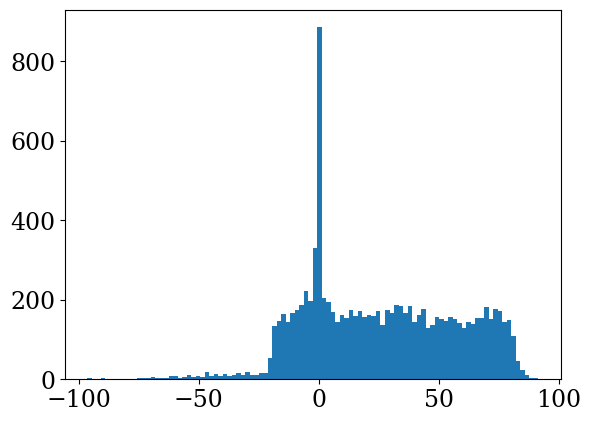

In [61]:
rm_src_m5 = MS_BS_band1_merge.RM_src_radm2 - MS_BS_band1_merge.deltaRM_radm2
plt.hist(rm_src_m5, bins=100)

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_13747/4071882190.py:3: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sigma_{RM, src}$')


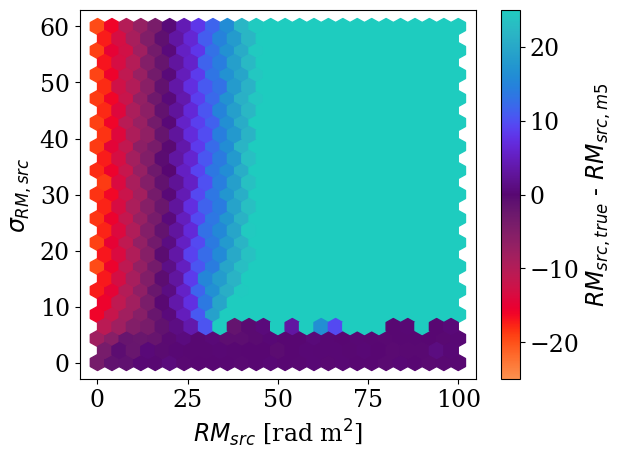

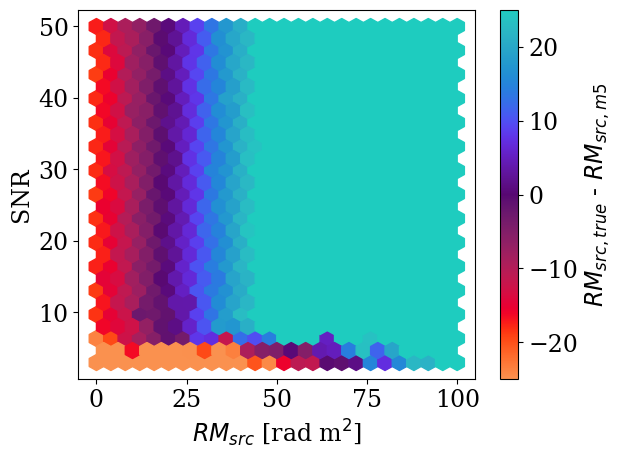

In [62]:

plt.hexbin(MS_BS_band1_merge.RM_src_radm2, MS_BS_band1_merge.sigma_RM_2, rm_src_m5, gridsize=25, cmap='cmr.guppy', reduce_C_function=np.median, vmin=-25, vmax=25)
plt.xlabel('$RM_{src}$ [rad m$^2$]')
plt.ylabel('$\sigma_{RM, src}$')
plt.colorbar(label='$RM_{src,true}$ - $RM_{src, m5}$')
plt.show()

plt.hexbin(MS_BS_band1_merge.RM_src_radm2, MS_BS_band1_merge.SNR, rm_src_m5, gridsize=25, cmap='cmr.guppy', reduce_C_function=np.median, vmin=-25, vmax=25)
plt.xlabel('$RM_{src}$ [rad m$^2$]')
plt.ylabel('SNR')
plt.colorbar(label='$RM_{src,true}$ - $RM_{src, m5}$')
plt.show()

/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_13747/2957051251.py:27: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


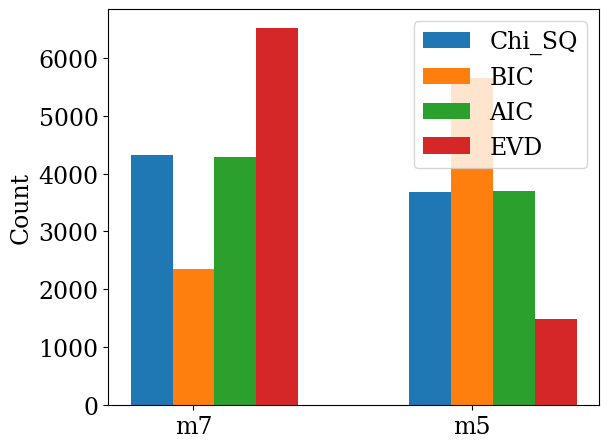

In [63]:
#Calculate the percentages
species = ("m7", "m5")
penguin_means = {
    'Chi_SQ': [np.sum(MS_MS_band1_merge['is_good_model_chi']), (8000-np.sum(MS_MS_band1_merge['is_good_model_chi']))],
    'BIC': [np.sum(MS_MS_band1_merge['is_good_model_BIC']), (8000-np.sum(MS_MS_band1_merge['is_good_model_BIC']))],
    'AIC': [np.sum(MS_MS_band1_merge['is_good_model_AIC']), (8000-np.sum(MS_MS_band1_merge['is_good_model_AIC']))],
    'EVD': [np.sum(MS_MS_band1_merge['is_good_model_evd']), (8000-np.sum(MS_MS_band1_merge['is_good_model_evd']))],
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
#ax.set_title('Burn Slab')
ax.set_xticks(x + width, species)
ax.legend(loc='upper right', ncols=1)
plt.tight_layout()
plt.show()

In [64]:
MS_MS_band1_merge['delta_BIC_7_5'] = MS_MS_band1_merge.BIC - MS_BS_band1_merge.BIC
MS_MS_band1_merge['delta_evd_7_5'] = MS_MS_band1_merge['ln(EVIDENCE) ']- MS_BS_band1_merge['ln(EVIDENCE) ']

# Check the other parameters

137.40858509914187


<>:27: SyntaxWarning: invalid escape sequence '\p'
<>:27: SyntaxWarning: invalid escape sequence '\p'
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_13747/3280996274.py:27: SyntaxWarning: invalid escape sequence '\p'
  ax_test[1].set_xlabel('$\psi_{0} deg$')


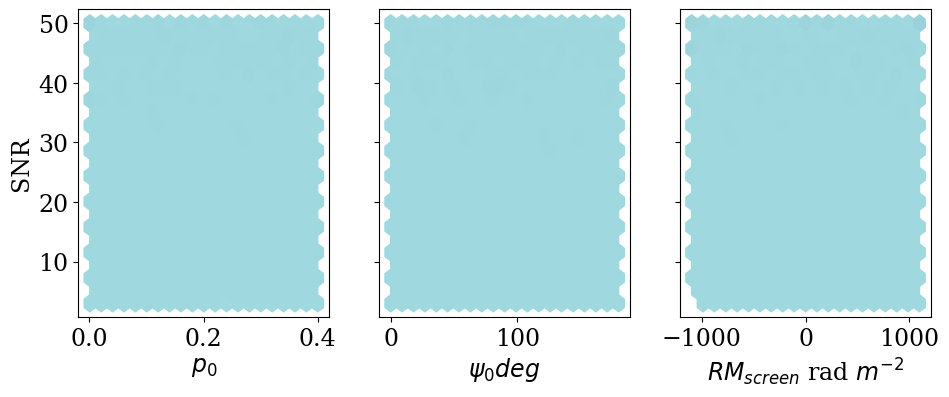

In [65]:
from matplotlib import gridspec 
from matplotlib.colors import ListedColormap 

fig_test, ax_test = plt.subplots(nrows=1, ncols=3, figsize=(11,4), sharey=True)
plt.rcParams.update({'font.size': 18})
plt.rc('font', family='serif')

bottom = plt.get_cmap('cmr.dusk_r', 2)
top= plt.get_cmap('cmr.sapphire', 254)
newcolors = np.vstack((top(np.linspace(0, 1, 254)),
                bottom(np.linspace(0, 0.09, 2))))
newcmp = ListedColormap(newcolors, name='embersaph')

bounds = [-10000,-70, -10, -2.5, 0, 9000]
cmap_rb = plt.get_cmap(newcmp)
colors = cmap_rb(np.linspace(0, 1, len(bounds) - 1))
cmap, norm = mcolors.from_levels_and_colors(bounds, colors)

print(max(MS_MS_band1_merge['delta_BIC_7_5']))


hex1 = ax_test[0].hexbin(MS_MS_band1_merge['frac_pol'],MS_MS_band1_merge['SNR'], MS_MS_band1_merge['delta_BIC_7_5'],reduce_C_function=np.median, vmin=-1200, vmax=100, gridsize=20, cmap=newcmp)
ax_test[0].set_xlabel('$p_{0}$')
ax_test[0].set_ylabel('SNR')

hex2 = ax_test[1].hexbin(MS_MS_band1_merge['psi0_deg_y'],MS_MS_band1_merge['SNR'], MS_MS_band1_merge['delta_BIC_7_5'], reduce_C_function=np.median, vmin=-1200, vmax=100, gridsize=20, cmap=newcmp)
ax_test[1].set_xlabel('$\psi_{0} deg$')
#plt.ylabel(values_interest[y_index])
#ax_test[0].set_title('Slab')

hex3 = ax_test[2].hexbin(MS_MS_band1_merge['RM_screen_radm2'],MS_MS_band1_merge['SNR'], MS_MS_band1_merge['delta_BIC_7_5'], reduce_C_function=np.median, vmin=-1200, vmax=100, gridsize=20, cmap=newcmp)
ax_test[2].set_xlabel('$RM_{screen}$ rad $m^{-2}$')
plt.show()

# Using Bayesian Evidence

<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\D'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\D'
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_13747/2350409537.py:16: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sigma_{RM}$')
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_13747/2350409537.py:25: SyntaxWarning: invalid escape sequence '\D'
  cb = plt.colorbar(hex2, label='$ln(\Delta$ $Bayes Factor_{T,A}$)', ticklocation='bottom')


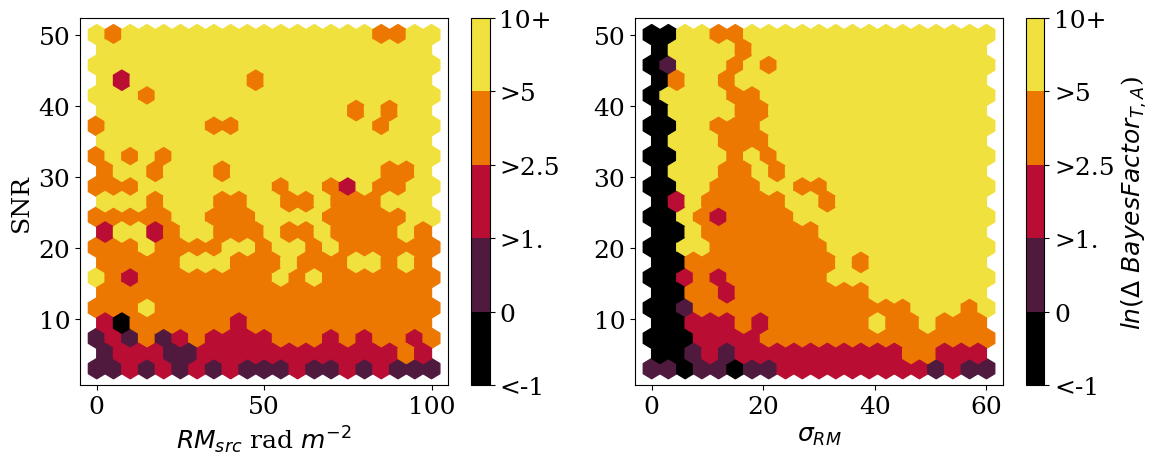

In [66]:
from matplotlib import gridspec
plt.rcParams.update({'font.size': 18})
plt.rc('font', family='serif')
fig_chi, ax_test = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

bounds = [-10000,0, 1, 2.5, 5, 10000]
cmap_rb = plt.get_cmap('cmr.ember')
colors = cmap_rb(np.linspace(0, 1, len(bounds) - 1))
cmap, norm = mcolors.from_levels_and_colors(bounds, colors)

hex1 = ax_test[0].hexbin(MS_MS_band1_merge['RM_src_radm2'],MS_MS_band1_merge['SNR'], MS_MS_band1_merge['delta_evd_7_5'],norm=norm, gridsize=20, cmap=cmap, reduce_C_function=np.median)
ax_test[0].set_xlabel('$RM_{src}$ rad $m^{-2}$')
ax_test[0].set_ylabel('SNR')

hex2 = plt.hexbin(MS_MS_band1_merge['sigma_RM_2'], MS_MS_band1_merge['SNR'], MS_MS_band1_merge['delta_evd_7_5'], gridsize=20, norm=norm, cmap=cmap, reduce_C_function=np.median)
plt.xlabel('$\sigma_{RM}$')
#plt.ylabel(values_interest[y_index])
#ax_test[0].set_title('Slab')


labels = ('<-1', '0','>1.', '>2.5', '>5' ,'10+')
cb2 = plt.colorbar(hex1)
cb2.ax.set_yticklabels(labels)

cb = plt.colorbar(hex2, label='$ln(\Delta$ $Bayes Factor_{T,A}$)', ticklocation='bottom')
cb.ax.set_yticklabels(labels)
plt.tight_layout()
plt.show()

<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_13747/1548994615.py:16: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sigma_{RM}$ rad m$^{-2}$')


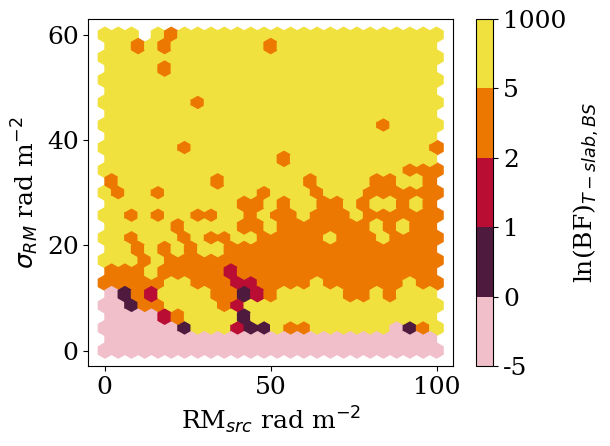

In [80]:

snr_cut= 8

bottom = plt.get_cmap('cmr.dusk_r',  1)
top= plt.get_cmap('cmr.ember' , 255)
newcolors = np.vstack((bottom(np.linspace(0 , 0.9 , 1)), 
                top(np.linspace(0 , 1 , 255))))
newcmp = ListedColormap(newcolors , name='embersaph')

bounds = [-10, 0,  1,  2,  5,  10000000000000000000]
cmap_rb = plt.get_cmap(newcmp)
colors = cmap_rb(np.linspace(0 , 1 , len(bounds) - 1))
cmap , norm = mcolors.from_levels_and_colors(bounds , colors)


plt.hexbin(MS_MS_band1_merge['RM_src_radm2'][MS_MS_band1_merge.SNR > snr_cut], MS_MS_band1_merge['sigma_RM_2'][MS_MS_band1_merge.SNR > snr_cut], MS_MS_band1_merge['delta_evd_7_5'][MS_MS_band1_merge.SNR > snr_cut], gridsize=25, norm=norm, cmap=cmap, reduce_C_function=np.median)
plt.ylabel('$\sigma_{RM}$ rad m$^{-2}$')
plt.xlabel('RM$_{src}$ rad m$^{-2}$')
labels = ('-5', '0','1', '2', '5' ,'1000')
cb = plt.colorbar(label='ln(BF)$_{T-slab, BS}$')
cb.ax.set_yticklabels(labels)
plt.tight_layout()
plt.savefig('BS_T_slab_comb.pdf')

<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\s'
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_84267/1084699503.py:24: SyntaxWarning: invalid escape sequence '\s'
  ax_test[1].set_xlabel('$\sigma_{RM}$ [rad $m^{-2}]$')
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_84267/1084699503.py:24: SyntaxWarning: invalid escape sequence '\s'
  ax_test[1].set_xlabel('$\sigma_{RM}$ [rad $m^{-2}]$')


NameError: name 'BS_BS_merge_5000' is not defined

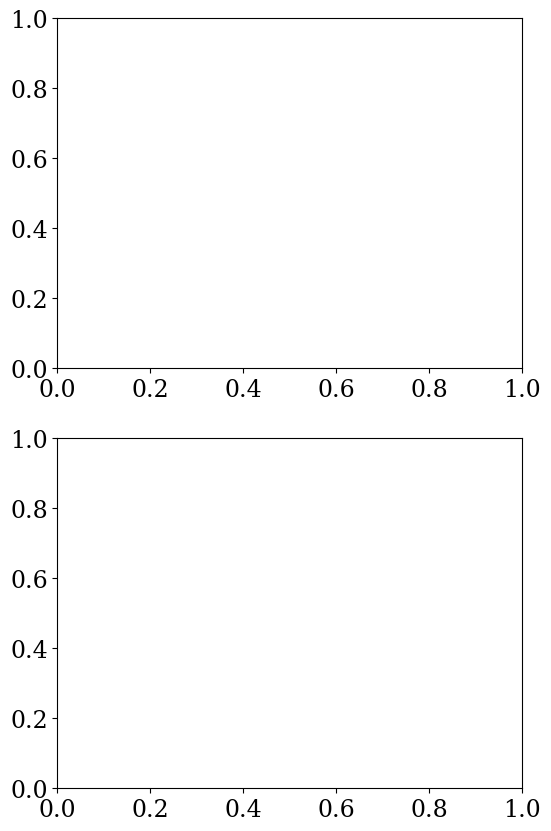

In [20]:
from matplotlib import gridspec
plt.rcParams.update({'font.size': 17})
plt.rc('font'  ,family='serif')
fig_chi, ax_test = plt.subplots(nrows=2, ncols=1, figsize=(6,10))
from matplotlib.colors import ListedColormap

boundsEVD = [-1000,0, 1, 2.5, 5, 1000]
cmap_rb = plt.get_cmap('cmr.ember')
colorsEVD = cmap_rb(np.linspace(0, 1, len(boundsEVD) - 1))
cmapEVD, normEVD = mcolors.from_levels_and_colors(boundsEVD, colorsEVD)


bounds = [-10000,0, 1, 2.5, 5, 10000]
cmap_rb = plt.get_cmap('cmr.ember')
colors = cmap_rb(np.linspace(0, 1, len(bounds) - 1))
cmap, norm = mcolors.from_levels_and_colors(bounds, colors)
snr_cut=7

hex1 = ax_test[0].hexbin( BS_BS_merge_5000['RM_src_radm2'], BS_BS_merge_5000['SNR'], BS_BS_merge_5000['delta_evd_5_7'], norm=normEVD ,  gridsize=20 , cmap=cmapEVD,  reduce_C_function=np.median)
ax_test[0].set_ylabel('$S:N$')
ax_test[0].set_xlabel('$RM_{src}$ [rad $m^{-2}$]')

hex2 = ax_test[1].hexbin(MS_MS_band1_merge['sigma_RM_2'][MS_MS_band1_merge.SNR > snr_cut], MS_MS_band1_merge['RM_src_radm2'][MS_MS_band1_merge.SNR > snr_cut], MS_MS_band1_merge['delta_evd_7_5'][MS_MS_band1_merge.SNR > snr_cut], gridsize=20, norm=norm, cmap=cmap, reduce_C_function=np.median)
ax_test[1].set_xlabel('$\sigma_{RM}$ [rad $m^{-2}]$')
ax_test[1].set_ylabel('$RM_{src}$ [rad $m^{-2}$]')

labels = ('-5', '0','1', '2', '5' ,'1000')
cb = plt.colorbar(hex2, label='$ln(BF)_{T-Slab,BS}$')
cb.ax.set_yticklabels(labels)

cb = plt.colorbar(hex1, label='$ln(BF)_{BS,T-Slab}$')
cb.ax.set_yticklabels(labels)
plt.tight_layout()
plt.savefig('BS-MS_selection.pdf', format='pdf')

# Percentages

In [67]:
def percentage_reduce_BIC_C(C):
    C = np.asarray(C)
    percentage = (len(C[C > 1]) / len(C)) * 100 
    return percentage

10000


<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_23211/1563036835.py:14: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sigma_{RM}$ radm-2')


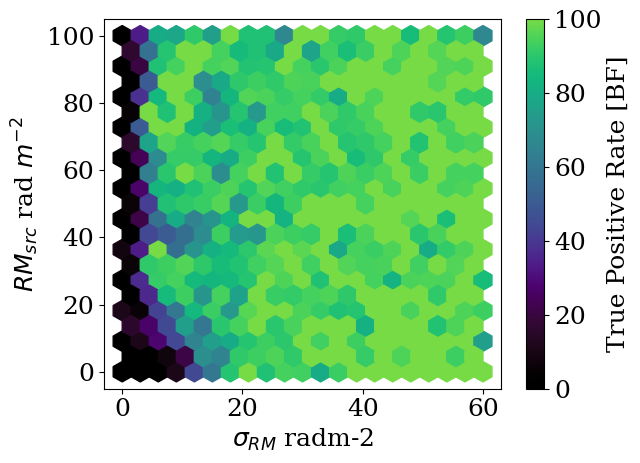

In [68]:
from matplotlib import gridspec
plt.rcParams.update({'font.size': 18})
plt.rc('font', family='serif')


bounds = [-2000,-500, -100, -5, 0, 10]
cmap_rb = plt.get_cmap('cmr.sapphire')
colors = cmap_rb(np.linspace(0, 1, len(bounds) - 1))
cmap, norm = mcolors.from_levels_and_colors(bounds, colors)

print(len(MS_MS_band1_merge))
plt.hexbin(MS_MS_band1_merge['sigma_RM_2'],MS_MS_band1_merge['RM_src_radm2'], MS_MS_band1_merge['delta_evd_7_5'], reduce_C_function=percentage_reduce_BIC_C, gridsize=20, cmap='cmr.lavender')
plt.ylabel('$RM_{src}$ rad $m^{-2}$')
plt.xlabel('$\sigma_{RM}$ radm-2')
#ax_test[0].set_title('Slab')

#labels = (' ','S', 'M', 'W', 'IC' ,'IM')
cb = plt.colorbar(label='True Positive Rate [BF]', ticklocation='bottom')
#cb.ax.set_yticklabels(labels)
plt.show()


# Combined Band